# PyOR also called Python On Resonance
## Author: Vineeth Francis Thalakottoor
## Email: vineeth.thalakottoor@ens.psl.eu or vineethfrancis.physics@gmail.com
## Example: Shape Pulse

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import sys
sys.path.append('/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source')

import PythonOnResonance_jeener as PyOR

import time
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib ipympl

import sympy as sp
from sympy import *

In [2]:
# Define Spin quantum numbers of individual spins
Spin_list = [1/2]

In [3]:
# Call PyOR module
System = PyOR.Numerical_MR(Spin_list)


PyOR default parameters/settings
--------------------------------

Define energy units: hbarEQ1 =  True

Define the matrix tolerence (make matrix elements less than tolarence value to zero): MatrixTolarence =  1e-06

Define the gyromagnetic ratios: Gamma =  [0]

Define the static field along Z: B0 =  None

Define rotating frame frequency: OmegaRF =  [0]

Define the offset frequencies of the spins: Offset =  [0]

Do you want to print the larmor frequency: print_Larmor =  True

Define the J coupling: Jlist = 
 [[0.]]

Define the spin paris dipolar coupled: DipolePairs =  []

Spin temperatures
----------------
Initial spin temperature of individual spins: Ispintemp =  [0]
Final spin temperature of individual spins =  [0]

Define propagation space <<Hilbert>> or <<Liouville>>: PropagationSpace =  Hilbert

Acquisition parameters
---------------------
Define acquisition parameter, dwell time: AcqDT =  0.0001
Define acquisition parameter, sampleing frequency: AcqFS =  10000.0
Define acquisit

In [4]:
# Generate Spin Operators
Sx,Sy,Sz,Sp,Sm = System.GenerateSpinOperators()

In [5]:
# Set Parameters

# Master Equation
System.PropagationSpace = "Hilbert"
System.MasterEquation = "Redfield"

# Gyromagnetic ratio of individual spins
System.Gamma[0] = System.gammaH1

# B0 Field in Tesla, Static Magnetic field (B0) along Z
System.B0 = 9.4

# Rotating Frame Frequency
System.OmegaRF[0] = -System.gammaH1*System.B0

# Offset Frequency in rotating frame (Hz)
System.Offset[0] = 0.0

# Define initial and final Spin Temperature
System.Ispintemp[0] = 300.0
System.Fspintemp[0] = 300.0

# Relaxation Process
System.Rprocess = "No Relaxation"

In [6]:
## Defien Hamiltonian

# generate Larmor Frequencies
LarmorF = System.LarmorFrequency()

# Lab Frame Hamiltonian
Hz_lab = System.Zeeman()

# Rotating Frame Hamiltonian
Hz = System.Zeeman_RotFrame()

Larmor Frequency in MHz:  [-400.22801765]


In [7]:
# Define initial density matrix

Thermal_DensMatrix = False

if Thermal_DensMatrix:    
    # High Temperature
    HT_approx = False
    
    # Initial Density Matrix
    rho_in = System.EqulibriumDensityMatrix(System.Ispintemp,HT_approx)
    
    # Equlibrium Density Matrix
    rhoeq = System.EqulibriumDensityMatrix(System.Fspintemp,HT_approx)
else:
    rho_in = np.sum(Sz,axis=0)
    rhoeq = np.sum(Sz,axis=0)

In [8]:
# Shape file
pulseFile = '/opt/topspin4.1.4/exp/stan/nmr/lists/wave/Rsnob.1000' # Rsnob.1000 or square.1000 or Gaus1.1000
pulseLength = 1000.0e-6 
RotatioAngle = 90.0
t, amp, phase = System.ShapedPulse_Bruker(pulseFile,pulseLength,RotatioAngle)

Nutation frequency of hard pulse for given pulse length and rotation angle:  250.0
Scaling Factor:  0.21369571573119997
Maximum nuB1:  1169.887749712614
Period corresponding to maximum nuB1:  0.0008547828629247999


/media/HD2/Vineeth/PostDoc_Simulations/Github/PyOR_V1/Source/PythonOnResonance_jeener.py:2360: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(fontsize=self.PlotFontSize,frameon=False)


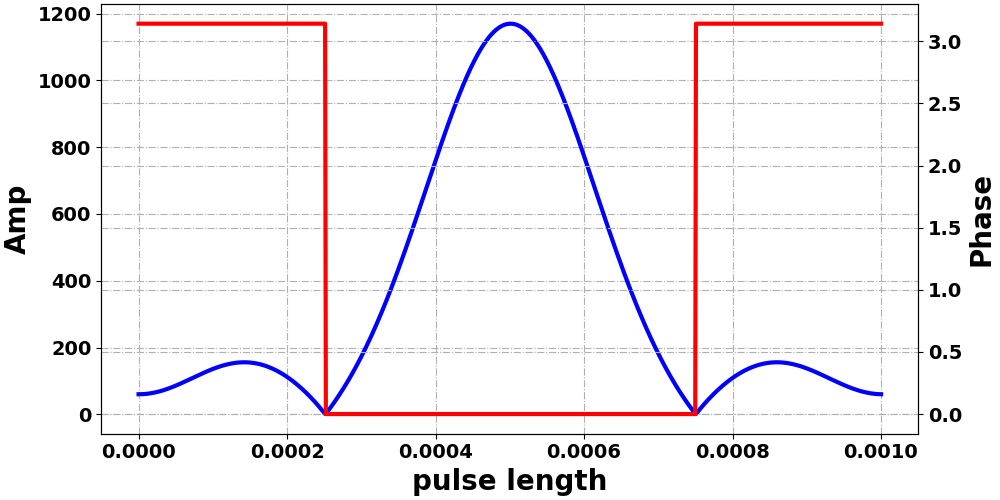

In [9]:
System.PlotFigureSize = (10,5)
System.PlotFontSize = 20
System.PlottingTwin(1,t,amp, phase,"pulse length","Amp","Phase","blue","red")

In [10]:
# Interpolartion
Kind = "previous"
Iamp, Iphase = System.ShapedPulse_Interpolate(t,amp,phase,Kind)

In [11]:
# Shape Pulse Parameters
System.ShapeFunc = "Bruker"
System.ShapeParOmega = Iamp
System.ShapeParPhase = Iphase
System.ShapeParFreq = 0.0

In [12]:
# Acquisition parameters
System.AcqAQ = pulseLength
Npoints = 1000
System.AcqDT = System.AcqAQ/Npoints 

System.PropagationMethod = "ODE Solver ShapedPulse"

start_time = time.time()
t, rho_t = System.Evolution(rhoeq,rho_in,Hz)
end_time = time.time()
timetaken = end_time - start_time
print("Total time = %s seconds " % (timetaken))

Total time = 22.873822927474976 seconds 


In [13]:
# Expectation value

t, Mx1 = System.Expectation(rho_t,Sx[0])
t, My1 = System.Expectation(rho_t,Sy[0])
t, Mz1 = System.Expectation(rho_t,Sz[0])

/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/anaconda3/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


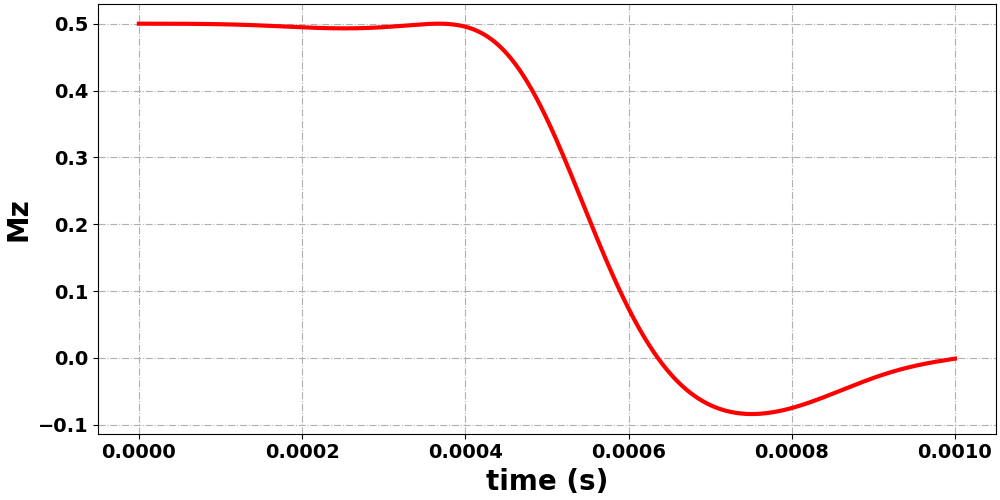

In [14]:
fig,span_selector = System.Plotting_SpanSelector(3,t,Mz1,"time (s)","Mz","red")

/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1222: ComplexWarning: Casting complex values to real discards the imaginary part
  v1[poly_i, :] = ps[i1, :] - ps[i2, :]
/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/art3d.py:1223: ComplexWarning: Casting complex values to real discards the imaginary part
  v2[poly_i, :] = ps[i2, :] - ps[i3, :]
/opt/anaconda3/lib/python3.12/site-packages/mpl_toolkits/mplot3d/axes3d.py:3034: ComplexWarning: Casting complex values to real discards the imaginary part
  UVW = np.column_stack(input_args[3:]).astype(float)


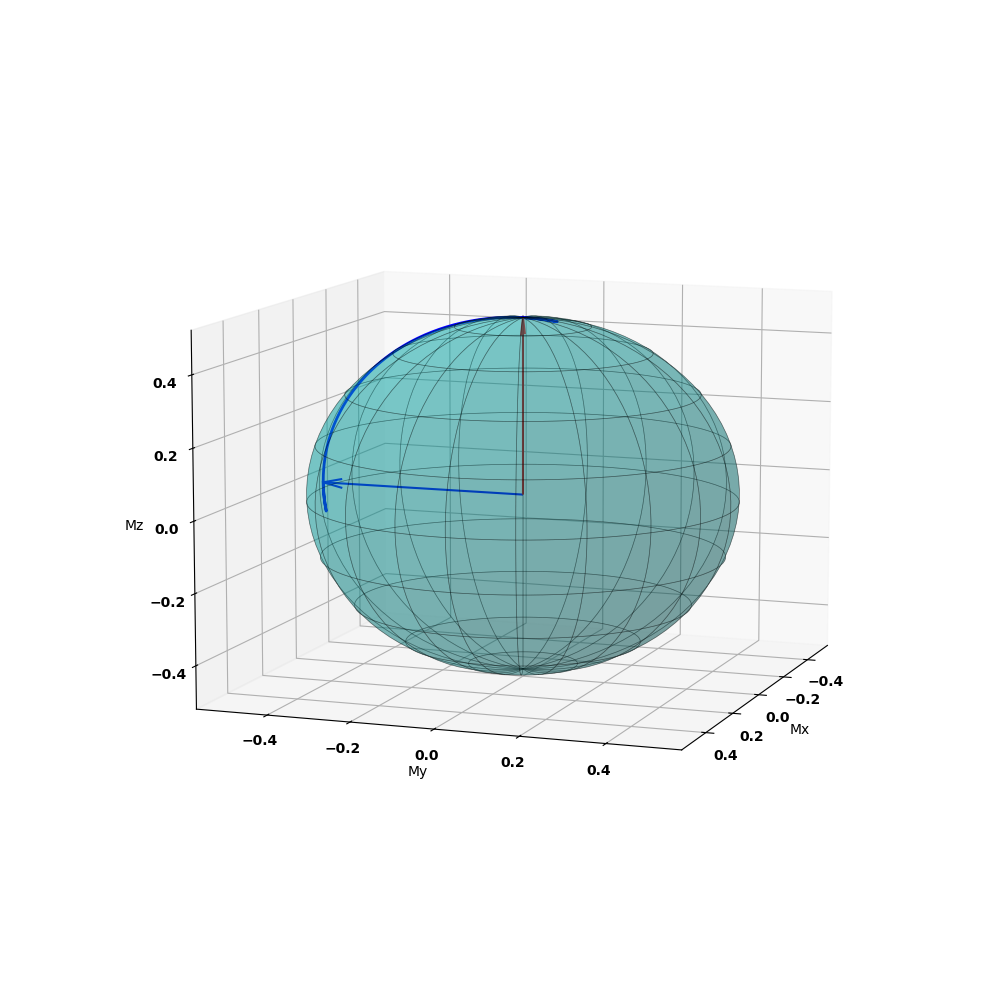

In [15]:
System.PlotFigureSize = (10,10)
System.PlotFontSize = 20
plot_vector = False
scale_datapoints = 2
System.PlottingSphere(5,Mx1,My1,Mz1,rhoeq,np.sum(Sz,axis=0),plot_vector,scale_datapoints)